<a href="https://colab.research.google.com/github/xtreegold/NNs/blob/main/Predictor_de_temperatura_2_1_(m%C3%BAltiples_capas_y_neuronas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#primero importamos tensorflow y numpy
import tensorflow as tf

In [2]:
import numpy as np

In [12]:
#Aquí definimos las variables que tienen una correlación lineal, en este caso los meses están representados por números, las temperaturas en Celcius.
mes = np.array([1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10 ,11 ,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], dtype=float)
temperatura = np.array([7, 7.9, 9, 10.8, 14.1, 17.9, 20.8, 21.4, 18.6, 14.5, 10.4, 8.1, 7.2, 8.1, 8.9, 10.4, 13.9, 17.8, 21.0, 21.6, 19.1, 14.3, 10.5, 8.2], dtype=float)


In [13]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=4, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=4)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [14]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'

)

In [15]:
print("Comenzando entrenamiento de la red...")
historial = modelo.fit(mes, temperatura, epochs=500, verbose=False)
print ("Modelo entrenado!")


Comenzando entrenamiento de la red...
Modelo entrenado!


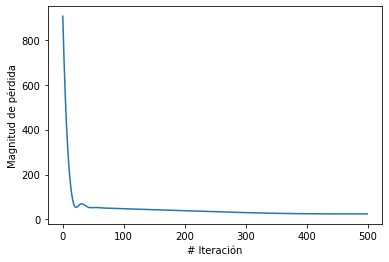

In [16]:
import matplotlib.pyplot as plt
plt.xlabel("# Iteración")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [20]:
print("Test de conversión de red neuronal")
resultado = modelo.predict([30])
print ("La temperatura en enero del año siguiente será de " + str(resultado) + " Celsius")

#el modelo tiene problemas para predecir temperaturas bajas, pero mejoró respecto a la predicción lineal de la primera versión.

Test de conversión de red neuronal
La temperatura en enero del año siguiente será de [[15.784163]] Celsius


In [21]:
print ("Variables internas del modelo")
print (salida.get_weights())

Variables internas del modelo
[array([[ 0.94155735],
       [-0.97305226],
       [-0.8215102 ],
       [-0.44036543]], dtype=float32), array([1.2353363], dtype=float32)]
